In [1]:
from astropy.io import fits
import numpy as np
from astropy.table import Table
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
import astropy.units as u
import matplotlib.pyplot as plt

In [108]:
cube_hdul = fits.open('/Users/nbudaiev/UFL Dropbox/Nazar Budaiev/Research/ACES/H40a_CubeMosaic_downsampled_x3_x1_5.fits')
cube = cube_hdul[0].data
cube_wcs = WCS(cube_hdul[0].header)
ACES_cat_path = '/Users/nbudaiev/UFL Dropbox/Nazar Budaiev/Research/ACES/cmz_sfr/aces_catalog_mv3_ms0.5_mp7_rms0.0001_min_peak0.0004_bl20_localrms2_globalrms3_tgif_fs1.0_2024_12_17_fullmask.fits'
#ACES_cat = Table.read(ACES_cat_path)
ACES_cat = Table.read('aces_zooniverse_catalog_with_SI.fits')
ACES_coords = SkyCoord(l = ACES_cat['GLON']*u.deg, b = ACES_cat['GLAT']*u.deg, frame='galactic')

In [109]:
len(ACES_cat)

1693

In [110]:
# at each location: 
# determine the RMS in spectra
# see if there are any 2-3 sigma channels
# check the nearby channels too?

In [111]:
ACES_coords[0]

<SkyCoord (Galactic): (l, b) in deg
    (0.81648888, -0.26430125)>

In [112]:
ACES_coords_pix_x, ACES_coords_pix_y = ACES_coords.to_pixel(cube_wcs)

In [113]:
ACES_coords_pix_x = np.int32(ACES_coords_pix_x)
ACES_coords_pix_y = np.int32(ACES_coords_pix_y)

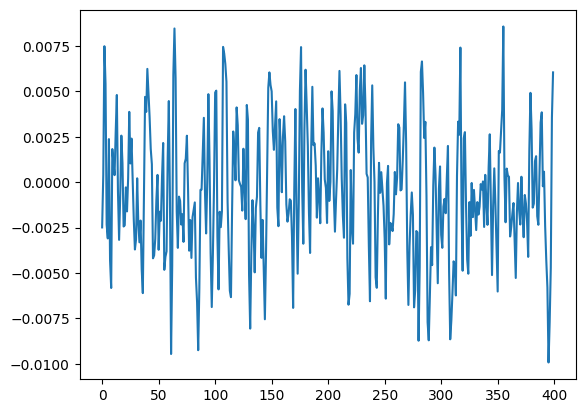

In [114]:
delta = 5
i=60
cutout = cube[5, ACES_coords_pix_y[i]-delta:ACES_coords_pix_y[i]+delta, ACES_coords_pix_x[i]-delta: ACES_coords_pix_x[i]+delta]
spectra = cube[:, ACES_coords_pix_y[i], ACES_coords_pix_x[i]]

plt.plot(spectra)

In [115]:
RRL_detected = []
channel_max = []
for i in range(len(ACES_cat)):
    spectra = cube[:, ACES_coords_pix_y[i], ACES_coords_pix_x[i]]
    spectra_rms = np.std(spectra)
    spectra_max = max(spectra)
    if (spectra_max/spectra_rms > 5):
        RRL_detected.append(True)
        channel_max.append(np.where(spectra == spectra_max)[0][0])
    else:
        RRL_detected.append(False)
        channel_max.append(np.nan)
RRL_detected = np.array(RRL_detected)
channel_max = np.array(channel_max)

In [116]:
len(ACES_cat)

1693

In [117]:
RRL_detected[66]

np.False_

In [118]:
channel_max

array([nan, nan, nan, ..., nan, nan, nan], shape=(1693,))

In [119]:
channel_max[0]

np.float64(nan)

In [121]:
#i = 66
#cutout = cube[int(channel_max[i]), ACES_coords_pix_y[i]-delta:ACES_coords_pix_y[i]+delta, ACES_coords_pix_x[i]-delta: ACES_coords_pix_x[i]+delta]

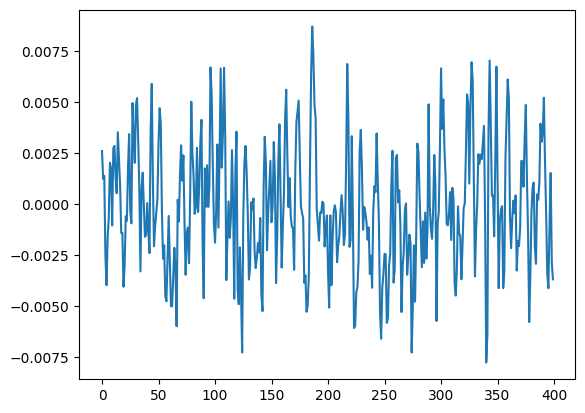

In [122]:
plt.plot(cube[:, ACES_coords_pix_y[i], ACES_coords_pix_x[i]])

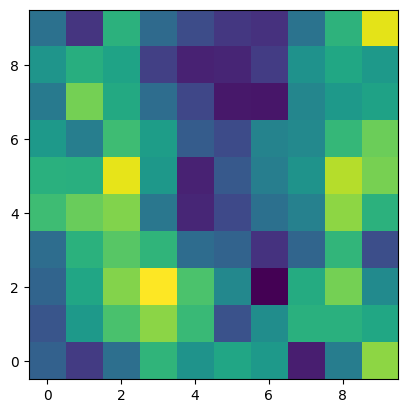

In [123]:
plt.imshow(cutout, origin='lower')

In [124]:
len(ACES_cat)

1693

In [126]:
ACES_cat.add_column(RRL_detected, name='H40a detection')
ACES_cat.add_column(channel_max, name='H40a peak (smoothed cube)')

In [127]:
ACES_cat

index,area_ellipse,area_exact,flux_integrated,major_sigma,minor_sigma,position_angle,radius,GLON,GLAT,is_leaf,peak_cont_flux,min_cont_flux,mean_cont_flux,bgsub_flux_integrated,npix,noise,x_peak,y_peak,axis_ratio,mass,bgsub_mass,eff_radius,eff_radius_pc,fit_size,flux,flux_err,pa,pa_err,fitted_major,fitted_major_err,fitted_minor,fitted_minor_err,deconvolved_major,deconvolved_minor,peak_flux,fitted_major_sigma,fitted_minor_sigma,SI_meerkat_aces,meerkat_lower_limit?,SI_cmzoom_aces,cmzoom_lower_limit?,H40a detection,H40a peak (smoothed cube)
,arcsec2,arcsec2,Jy,arcsec,arcsec,deg,arcsec,,,,,,,,,,,,arcsec,solMass,solMass,arcsec,pc,,Jy,Jy,deg,deg,deg,deg,deg,deg,deg,deg,Jy / beam,deg,deg,,,,,,
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,float64,float64,float64,int64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,bool,bool,float64
278,5.583657781682184,17.249999997792,0.0009280886357648368,1.2104631655658729,1.059178798170527,74.30033519939772,1.1322971875500498,0.8164888762331689,-0.2643012530381366,True,0.0005530889613515936,0.0003012524793718248,0.00039954122799589154,0.00022831554401962377,69,0.00014800699605171404,667,344,1.142831755749504,34.05797344257991,8.378472093174986,2.3432553288038336,0.0929054472593884,1.8306406697665383,0.0013799466938245394,1.2937743948573404e-06,75.70748095451773,4.6044980313677915,0.0011244416388311725,2.4667194473197392e-05,0.0010005903738879273,2.1374013474833078e-05,0.0008710193816052084,0.0007039082754959587,0.00042991493737184783,0.000477506398505451,0.00042491160885067825,-0.014342759945306253,True,--,False,False,nan
344,1.6048503198059558,4.99999999936,0.0002428965448226175,0.63640503730168,0.5790325645261061,61.01133387911499,0.6070413831248442,0.759739910316862,-0.26145996201878824,True,0.0004329876792611022,0.0003071576460452689,0.00036075518133536755,3.608754993500588e-05,20,0.0001410963125039162,1076,364,1.0990833267253783,8.913549583597387,1.324301117297199,1.2615662609293399,0.05001861140707411,0.9855838057739428,0.0006575262587600558,9.314553974246821e-08,57.27212022741094,1.405805035520237,0.0009017208553446233,7.802861832792505e-06,0.0007439936033911516,6.079886739963225e-06,0.0005544423008374137,0.00021870584327184116,0.0003435462797400996,0.00038292559010927394,0.00031594499331747165,-0.1145236090326937,True,--,False,False,nan
388,7.64507806585681,22.999999997055998,0.001328168434434984,1.4095276544809476,1.2454043772354977,105.09297389280422,1.3249271341191018,0.7556126066358904,-0.2593177195096351,True,0.0006766956841780058,0.000301419388578991,0.0004288313854114426,0.0003946214906406875,92,0.0001409098500399382,1107,379,1.1317831222094825,48.739660765247635,14.481384352945916,2.7057581897298366,0.10727796996878096,2.1138417669583753,0.0019226295742282816,5.535143113922007e-06,73.34343876350331,4.409097065048677,0.0012375299155729888,5.030836149549654e-05,0.0009874496874644862,3.457963106036523e-05,0.001012810967521945,0.000685100466550867,0.0005514909627422182,0.0005255305679023655,0.0004193312731255896,0.01895824681525181,True,--,False,False,nan
478,8.965680321187095,36.499999995328,0.003398452574283544,1.668064792796191,1.2341626472209228,111.4892586677149,1.4348042585709617,0.76275165821545,-0.25602786462788274,True,0.0017656034852445643,0.00030056995991997975,0.000691432188987853,0.0019211405705467646,146,0.0001705446775513655,1054,403,1.351576144807433,124.7126654292361,70.49989840380235,3.4085643376972095,0.13514284611392036,2.6629008053038885,0.00267767795167158,1.3639248698979401e-06,116.0161580863866,1.4296490776769466,0.000919205848297619,1.4400527318227882e-05,0.0007137573952422984,1.1595790139563367e-05,0.0005824475560417468,6.128118191824959e-05,0.0014305676741939916,0.00039035078295570475,0.00030310485794803803,0.20492196965284348,True,--,False,False,nan
489,2.992883239634674